# **MN1: 2º parcial (programación) 10/06/2022**

<hr>

**Nombre:**

**NIU:**

**mail (gmail):**

<hr>

**Instrucciones de edición del Notebook y entrega**

*   Abre el Notebook desde GitHub ("Open in Colab") y genera una copia en tu Drive ("Guardar una copia en Drive"). Edita esa copia para el examen.
*   Renombra esa copia como usando tu NIU como nombre de archivo: "NIU.ipynb" (*por ejemplo, 2055007.ipynb*)
*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu examan) en la cabecera de este Notebook.
*   Al final del examen, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](http://cern.ch/go/8HhV). Asegurate de que el fichero tiene el nombre correcto.
*   Podéis volver a subir el fichero si creéis que hay un error pero sólo consideraremos la última versión, y dentro del horario establecido.
*   **NOTA** Antes de entregar o dar por finalizado cada ejercicio, es recomendable reiniciar el entorno de ejecución para ver que se ejecuta todo de forma correcta: "Entorno de ejecución >> Reiniciar entorno de ejecución",y luego "Entorno de ejecución >> Ejecutar todas".

<hr>

**Instrucciones del examen**

*   El examen se realiza de forma individual.
*   El horario es de 9h a 12h. No se aceptarán entregas pasada esa hora.
*   Podéis consultar apuntes, entregas o usar internet para buscar información, pero **NO** comunicaros entre vosotros/as.

<hr>

## **EXAMEN**

In [ ]:
# Ejecuta esta parte de código para importar librerías comunes (añade las que creas necesarias a esta lista)

import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import math
from collections import Counter

<font color='green'>**> Ejercicio #1 [6 puntos]**</font>

En este ejercicio vamos a determinar el 'volumen' de una [n-esfera](https://es.wikipedia.org/wiki/N-esfera) de radio unidad.

Una n-esfera (o hiperesfera) es la generalización de la «esfera» a un espacio euclídeo de dimensión arbitraria. En general, el volumen de la $n$-esfera de radio $R$ es proporcional a la potencia $n$ del radio $R$ (con diferentes constantes de proporcionalidad que varían con n), es decir $V_n(R) = V_nR^n$.

En particular, el volumen del espacio delimitado por una n-esfera de radio R viene determinado por:

$$
V_n(R) = V_n R^n = \frac{\pi^{n/2}}{\Gamma(n/2+1)}R^n
$$

donde $\Gamma$ es la [función gamma](https://es.wikipedia.org/wiki/Funci%C3%B3n_gamma).

Por ejemplo, si n=2, se obtiene el área de un círculo y la constante de proporcionalidad $V_2=\pi$. Si n=3, tenemos una bola, y la constante de proporcionalidad $V_3=(4/3)\pi$. Considerando R=1 en este ejercicio, se obtiene que $V_2(1) =\pi$ y que $V_3(1)=(4/3)\pi$. A partir de aquí podemos seguir generando «esferas» en n-dimensiones y calcular sus volúmenes de forma numérica o analítica...

**1.1 [0.5 puntos]:** Define una función que devuelva una lista de los valores analíticos $V_n$ (recuerda que R=1), pasándole como argumento una lista de las dimensiones $n$ a evaluar (es decir, si n=[1,3,5] devolverá una lista V=[$V_1,V_3,V_5$]).

In [ ]:
import math
def V(R,n):
  t=[]
  for i in n:
    t.append(np.pi**(i/2)*R**i/math.gamma(i/2+1))
  return t

print(V(1,[1,2,3,4,5,6]))

[1.9999999999999998, 3.141592653589793, 4.1887902047863905, 4.934802200544679, 5.263789013914325, 5.167712780049969]


**1.2 [1 punto]:** Realiza una gráfica de los valores analíticos $V_n$, en el rango de dimensiones [2,10].

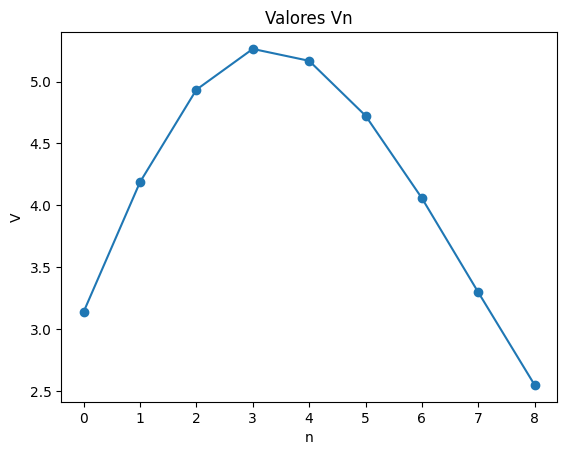

In [ ]:

plt.plot(V(1,[2,3,4,5,6,7,8,9,10]),marker="o")
plt.ylabel("V")
plt.xlabel("n")
plt.title("Valores Vn")
plt.show()

1.9999999999999998


**1.3 [1.5 puntos]:** Define una función que devuelva una lista de los valores numéricos de $V_n$ usando el método MC de aceptación-rechazo, pasándole como argumentos el número de intentos MC ($N_{mc}$) y una lista de las dimensiones $n$ a evaluar. Repite la gráfica del apartado 1.2, pero ahora añadiendo los "volúmenes" calculados por el método de aceptación-rechazo, usando $N_{mc}$ = 1e4.

In [ ]:
def V_MC(N,n):
  l=[]
  for i in n:
    r=0
    for w in range(N):
      t=np.random.uniform(-1,1,int(i)) # Generar puntos entre -1 y 1
      # t=t**2 # Esto no es necesario aquí, ya que sumamos los cuadrados directamente
      if sum(t**2) <= 1: # Condición de aceptación correcta para una esfera unitaria
        r+=1 # Incrementar el contador correctamente
    # Calcular el volumen MC: (puntos aceptados / total de puntos) * Volumen del cubo
    volume_mc = (r / N) * (2**i) #el cubo es de largo 2 y tiene i caras
    l.append(volume_mc)
  return l

print(V_MC(10**4,np.linspace(1,7,7)))

[np.float64(2.0), np.float64(3.13), np.float64(4.1376), np.float64(4.8592), np.float64(5.2864), np.float64(5.4144), np.float64(4.5312)]


**1.4 [1.5 puntos]:** Como hemos usado pocas realizaciones MC, verás que la comparación entre el valor analítico y numérico varía, si repites la experiencia.

Define una función que calcule el error relativo entre medidas, en porcentaje ( $100.*|V_{mc}-V_{analytic}|/V_{analytic}$ ), y realiza una gráfica del error relativo vs. n, usando los resultados obtenidos en el apartado 1.3.

Text(0.5, 1.0, 'Distribución Errores')

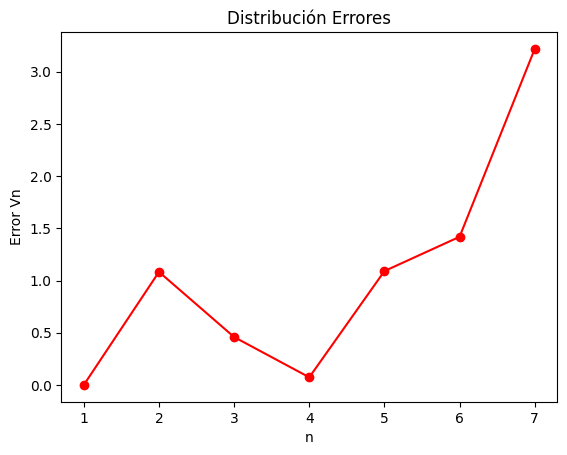

In [ ]:

#for i in range(10**2):
def ERROR(t,N):
  V1=[]
  V2=[]
  V3=[]
  V4=[]
  V5=[]
  V6=[]
  V7=[]
  #hay que añadir las listas a mano
  ListaMC=V_MC(N,t)
  ListaA=V(1,t)
  for w in range(len(ListaMC)):
    Error=100*np.abs((ListaMC[int(w)]-ListaA[int(w)])/ListaA[int(w)])
    if int(w+1)==1:
      V1.append(Error)
    if int(w+1)==2:
      V2.append(Error)
    if int(w+1)==3:
      V3.append(Error)
    if int(w+1)==4:
      V4.append(Error)
    if int(w+1)==5:
      V5.append(Error)
    if int(w+1)==6:
      V6.append(Error)
    if int(w+1)==7:
      V7.append(Error)
    #hay que añadir las condiciones a mano
  ERROR1=sum(V1)/len(V1)
  ERROR2=sum(V2)/len(V2)
  ERROR3=sum(V3)/len(V3)
  ERROR4=sum(V4)/len(V4)
  ERROR5=sum(V5)/len(V5)
  ERROR6=sum(V6)/len(V6)
  ERROR7=sum(V7)/len(V7)
  return [ERROR1,ERROR2,ERROR3,ERROR4,ERROR5,ERROR6,ERROR7]

plt.plot(np.linspace(1,7,7),ERROR(np.linspace(1,7,7),10**4),color="red",marker="o")
plt.xlabel("n")
plt.ylabel("Error Vn")
plt.title("Distribución Errores")



**1.5 [1.5 puntos]:** Como este error relativo varía, vamos a realizar varias experiencias para promediar los resultados.

Se trata de hacer un promedio de 50 realizaciones de simulaciones MC, para las dimensiones consideradas en el rango [2,10], usando diferentes números de intentos MC. En particular $N_{mc} = [1e1,1e2,1e3,1e4,1e5,1e6]$.

Haz una gráfica de este error promediado en función de $n$, para cada caso considerado de $N_{mc}$. Representaremos los 6 casos en el plano (n,errR), con diferentes colores. No hace falta dibujar las barras de error (dev.std/$\sqrt50$)!!

**Nota:** verás que eres capaz de calcular todos los $V_{n}$ con un error relativo entre el 1 por mil y un 1% si $N_{mc}=1e6$, y que si $N_{mc}$ toma valores bajos es imposible calcular los volúmenes de esferas con un $n$ grande...


In [ ]:

import numpy as np
import math

def V(R, n):
    # Volumen exacto de esfera en dimensiones n con radio R
    t = []
    for i in n:
        t.append(np.pi**(i/2) * R**i / math.gamma(i/2 + 1))
    return t

def V_MC(N, n):
    l = []
    for i in n:
        r = 0
        dim = int(i)  # aseguramos entero
        for _ in range(int(N)):
            t = np.random.uniform(-1, 1, dim)
            if sum(t**2) <= 1:
                r += 1
        volume_mc = (r / N) * (2 ** dim)
        l.append(volume_mc)
    return l

def ERROR(t, N):
    ListaMC = V_MC(N, t)
    ListaA = V(1, t)
    errores = []
    for mc, exacto in zip(ListaMC, ListaA):
        err = 100 * abs(mc - exacto) / exacto
        errores.append(err)
    return errores

def MediaErrores(N):
    N = int(N)  # asegurar entero
    erroresVn = []
    Nmc1 = [[] for _ in range(7)]
    t = np.linspace(1, 7, 7)
    for _ in range(50):
        e = ERROR(t, N)
        for j in range(7):
            Nmc1[j].append(e[j])
    for i in range(len(Nmc1)):
        t = sum(Nmc1[i]) / len(Nmc1[i])  # media sin multiplicar por 100 otra vez
        erroresVn.append(t)
    return erroresVn

print(MediaErrores(1e4))


[np.float64(1.1102230246251567e-14), np.float64(0.4803127249740389), np.float64(0.7184984288340402), np.float64(1.2845833599136858), np.float64(1.3579488153424006), np.float64(2.6061622100193462), np.float64(4.659816933356659)]


In [ ]:
""""
def MediaErrores(N):
  erroresVn=[]
  Nmc1=[[]for i in range(7)]
  for r in range(50):
    t=ERROR(np.linspace(1,7,7),N)
    for j in range(7):
      #Nmc1.append(t[j]) así lo que hago es [meto un valor,[],[],...]
      Nmc1[j].append(t[j]) #así lo meto en la lista que quiero
  for i in range(len(Nmc1)):
    #t=100*(sum(Nmc1[int(i)])/len(int(i))) #en un bucle con un range si pones int(i) esto es 0,1,2,3,... el numero por el que vaya el bucle, en un for con una lista coge el valor de la lista.
    t=100*(sum(Nmc1[i])/len(Nmc1[i]))
    erroresVn.append(t)
  return erroresVn

print(MediaErrores(1e4))
""""


<font color='green'>**> Ejercicio #2 [4 puntos]**</font>

Tenemos una baraja de 52 cartas (4 palos de 13 cartas). Las barajamos y repartimos 2 cartas al jugador "1" y 2 cartas al jugador "2". Entonces, descartamos de la pila $n_{el}$ cartas. Acto seguido, repartimos 3 cartas al jugador "1" y 3 cartas al jugador "2", de manera que tienen 5 cartas cada uno.

Vamos a calcular las probabilidades de que alguno de los dos jugadores tenga: a) al menos una pareja de cartas iguales, b) tres cartas iguales o c) 4 cartas iguales (póker).

Para calcular una probabilidad de este tipo podemos usar la definición frecuentista, en la que para un número $N$ de realizaciones del experimento se calcula la probabilidad como:

$$
P(A) = \frac{\text{# de veces que ha ocurrido A}}{N}
$$

que tiende al valor real si $N \to \infty$.

>**Nota** Para modelizar este escenario tendrás que utilizar herramientas de generación y manipulación de listas. Puedes generar una lista de números enteros 4x[1,13] que se correspondan a los números de los palos de la baraja. Para barajar una lista puedes usar el método ``random.shuffle(a)`` y para dividir una lista en sublistas puedes usar la sintaxis ``a[0:10]``.

Os ponemos unos ejemplos en código:


In [ ]:
# Ejemplo de barajar una lista:

a = [1,2,3,4,5,6,7,8,9,10,1,2,3,4]
print("La lista antes de barajar es:",a)
random.shuffle(a)
print("La lista después de barajar es:",a)

# Ejemplo dividir una lista en dos, nos quedamos con los primeros 10 elementos:
b = a[0:5]
c = a[5:10]
print("La primeras 5 cartas de la lista son",b,"y le siguen",c)

# Usamos la función Counter para contar parejas (count(2)), trios (count(3)) o poker(count(4)):
if list(Counter(b).values()).count(2) > 0 or list(Counter(c).values()).count(2) > 0:
  print("*** Uno de los jugadores tiene una pareja ***")

La lista antes de barajar es: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4]
La lista después de barajar es: [4, 9, 3, 8, 6, 7, 4, 2, 1, 2, 3, 10, 5, 1]
La primeras 5 cartas de la lista son [4, 9, 3, 8, 6] y le siguen [7, 4, 2, 1, 2]
*** Uno de los jugadores tiene una pareja ***


**2.1 [1 punto]:** Define una función que nos devuelva True o False a la pregunta de si alguno de los jugadores tiene n cartas iguales ($n_{eq}$), después de haber barajado las cartas, haber hecho el primer reparto, haber eliminado $n_{el}$ cartas, y hecho el segundo reparto. Es decir, queremos una función del estilo:

```
def get_answer(n_el,n_eq):
  --> código
  return True or False
```

O lo que es lo mismo, ver qué sucede en una de las realizaciones.

In [ ]:
import numpy as np

def get_answer(n,n_eq):
  lista=list(np.linspace(1,13,13)) #pero esto es una lista que en vd es un array entonces si lo sumas te hará operaciones numericas
  cartas=lista+lista+lista+lista
  random.shuffle(cartas)
  J1=cartas[0:2]+cartas[4+n:4+n+3]
  J2=cartas[2:4]+cartas[4+n+3:4+n+6]
  if list(Counter(J1).values()).count(n_eq) > 0 or list(Counter(J2).values()).count(n_eq) > 0:
    print("Olé")
  else:
    print("Me ha timado el payo este")

get_answer(4,3)



Me ha timado el payo este


**2.2 [1.5 puntos]:** Vamos a realizar 3 simulaciones del experimento con N=1e4 intentos para evaluar la probabilidad de que alguno de los jugadores tenga una pareja, un trío o un póker, respectivamente. Como esto va a fluctuar, relizaremos un promedio de 25 pruebas para cada caso, y no eliminaremos cartas en este caso, es decir usa $n_{el}$=0.

Haz una gráfica, con sus errores (ahora si!), de la probabilidad (eje y) para cada una de las configuraciones (2,3,4 en eje x).

Imprime por pantalla los valores promedios, con sus errores, y cuánto de grande es el error en porcentaje respecto al valor, es decir $100.*err/valor$.

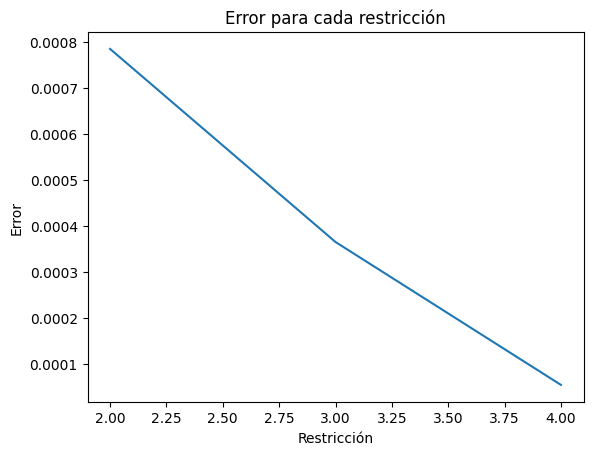

Dates para parejas [0.720668, np.float64(0.0008045437630524923), np.float64(0.11163861348810995)] datos para trios;) [0.0444, np.float64(0.0003355592347112503), np.float64(0.7557640421424556)] datos para poker [0.00046799999999999994, np.float64(3.8609152628187354e-05), np.float64(8.249818937646872)]


In [ ]:
def Probabilidad(n_quitar,n_eq,intentos):
  r=0
  #for i in range(intentos): esto da error porque le estoy pasando algo con decimales a un range.
  for i in range(int(intentos)):
    lista=list(np.linspace(1,13,13)) #pero esto es una lista que en vd es un array entonces si lo sumas te hará operaciones numericas
    cartas=lista+lista+lista+lista
    random.shuffle(cartas)
    J1=cartas[0:2]+cartas[4+n_quitar:4+n_quitar+3]
    J2=cartas[2:4]+cartas[4+n_quitar+3:4+n_quitar+6]
    if list(Counter(J1).values()).count(n_eq) > 0 or list(Counter(J2).values()).count(n_eq) > 0:
      r=r+1
  return r/intentos

def CosasdeN(N):
  lista=[]
  for i in range(25):
    t=Probabilidad(0,N,1e4)
    lista.append(t)
  Probabilidad2=sum(lista)/len(lista)
  error_estandar = np.std(lista, ddof=1) / np.sqrt(len(lista))
  quetangrandeeselerror=100*(error_estandar/Probabilidad2)
  return [Probabilidad2,error_estandar,quetangrandeeselerror]

plt.plot([2,3,4],[CosasdeN(2)[1],CosasdeN(3)[1],CosasdeN(4)[1]]) #antes había puesto CosasdeN(3)[2] y claro este elemento no existe los indices son 0,1.
plt.xlabel("Restricción")
plt.ylabel("Error")
plt.title("Error para cada restricción")
plt.show()
print("Dates para parejas",CosasdeN(2),"datos para trios;)",CosasdeN(3),"datos para poker",CosasdeN(4))

**2.3 [1.5 puntos]:** Si eliminamos cartas al principio (entre el primer y segundo reparto de cartas, como se describe en el problema), afectará al resultado obtenido?  No hace falta que hagas 25 realizaciones para promediar en este caso, pero haz que $n_{el}$ varíe entre [0,42] (en pasos de 1 carta, es decir, retirar 1, 2, 3, 4...), y realiza 3 simulaciones del experimento con N=1e4 intentos para evaluar la probabilidad de que alguno de los jugadores tenga una pareja, un trío o un póker, respectivamente.

Haz una gráfica de las probabilidades que obtienes para cada caso (2, 3 o 4 cartas iguales) en función de $n_{el}$. Eliminar cartas afecta al resultado? Razona tu respuesta con un comentario en el código o una celda de texto que insertes....

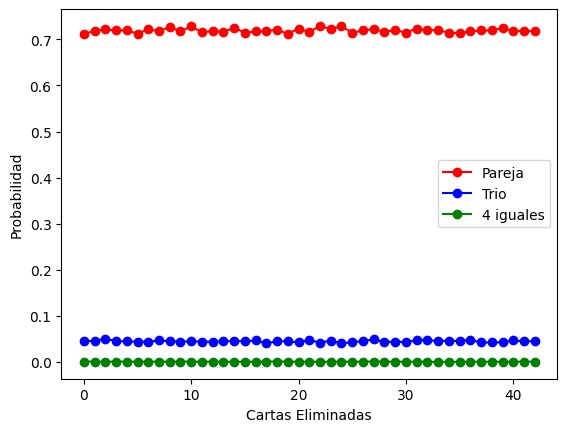

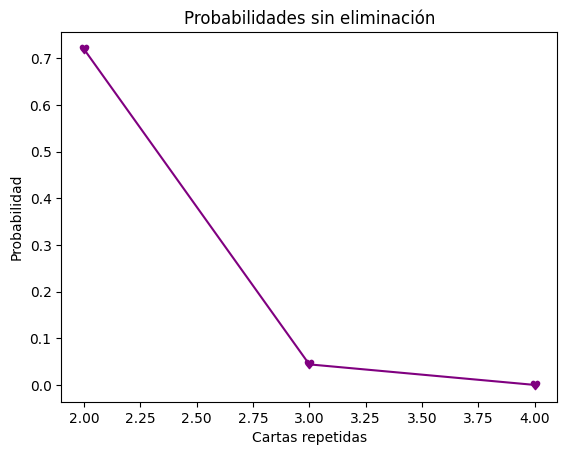

In [ ]:
def ProbsinNc(n_eq,intentos):
  Probabilidad_sinNcartas_ordenadodel0AL42=[]
  for i in range(43):
    Probabilidad_sinNcartas_ordenadodel0AL42.append(Probabilidad(i,n_eq,intentos))
  return Probabilidad_sinNcartas_ordenadodel0AL42

plt.figure()
plt.plot(range(43), ProbsinNc(2,1e4), color="red", marker="o", label="Pareja")
plt.plot(range(43), ProbsinNc(3,1e4), color="blue", marker="o", label="Trio")
plt.plot(range(43), ProbsinNc(4,1e4), color="green", marker="o", label="4 iguales")
plt.legend()
plt.ylabel("Probabilidad")
plt.xlabel("Cartas Eliminadas")
plt.show()

plt.figure() #separar los gráficos
plt.plot([2,3,4],[CosasdeN(2)[0],CosasdeN(3)[0],CosasdeN(4)[0]], color="purple", marker='$♥$')
plt.ylabel("Probabilidad")
plt.xlabel("Cartas repetidas")
plt.title("Probabilidades sin eliminación")
plt.show()
